<a href="https://colab.research.google.com/github/suh-930/ESE527_Project/blob/main/ESE_527_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Churn

## Part 1: Data Cleaning and Preprocessing

In [ ]:
import numpy as np
import pandas as pd

In [6]:
# install pydrive to load data
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [5]:
bank_df = pd.read_csv('bank.data.csv')
print(bank_df)

FileNotFoundError: ignored

In [ ]:
# Check whether there is any missing value or not.
# No missing value in this dataset.
bank_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Check data infomation
# There are 2 float data type, 9 int data type, and 3 object data type.
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
bank_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
# check the unique values for each column
bank_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
# understand numerical features
bank_df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].describe()

NameError: ignored

In [ ]:
# check the feature distribtion
import matplotlib.pyplot as plt
import seaborn as sns

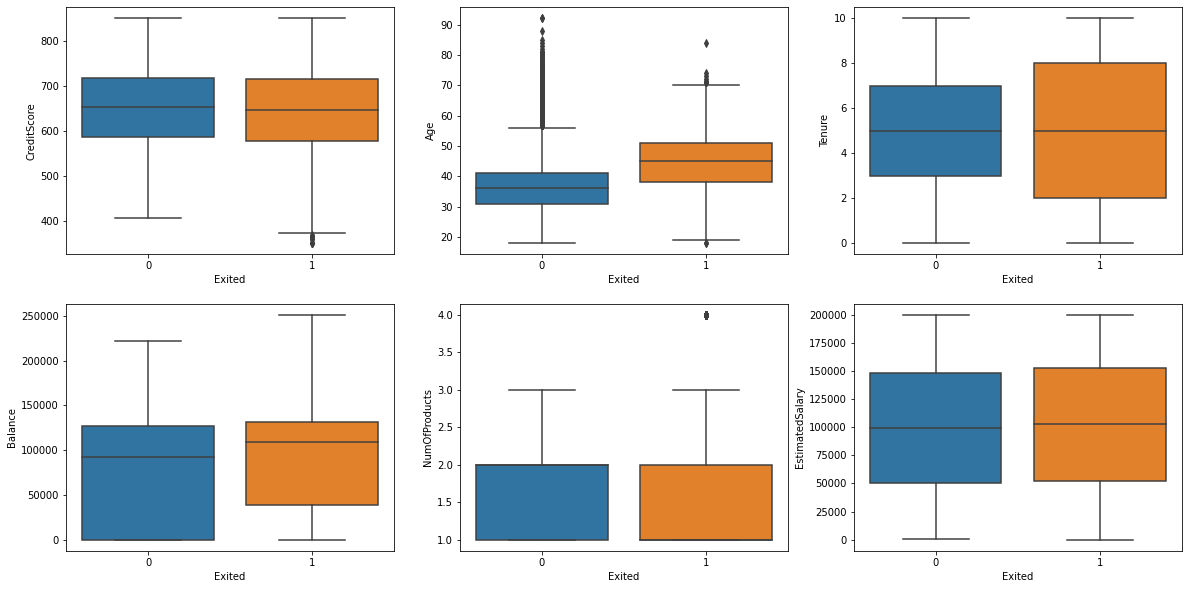

In [ ]:
# boxplot for numerical feature
# Plot1: CreditScore does not have much effect on whether to exit
# Plot2: older customers are more likely to exit than younger ones
# Plot3: customers with tenure at 2 and 8 years were more likely to quit, that is, customers 
# using the company's plan for a short time or a long time were more likely to quit, 
# while there was no significant difference for customers with medium years of use
# Plot4: customers with Balance lower than 50,000 are more likely to exit
# Plot5: NumOfProducts does not have much effect on whether to exit
# Plot6: EstimatedSalary does not have much effect on whether to exit

_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=bank_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=bank_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=bank_df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='Balance', data=bank_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='NumOfProducts', data=bank_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=bank_df, ax=axss[1][2])

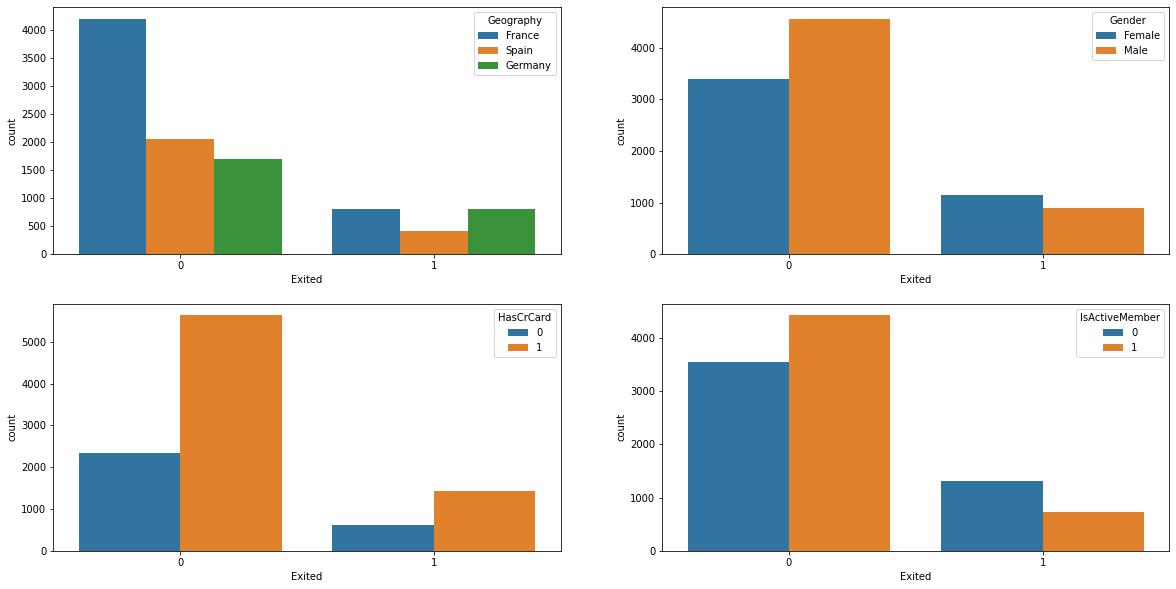

In [ ]:
# understand categorical features
# countplot for numerical features
# Plot1: Germany are more likely to exit than others two countries
# Plot2: Female are more likely to exit than Male
# Plot3: HasCrCard does not have much effect on whether to exit
# Plot4: inactive members are more likely exit than active members
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=bank_df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=bank_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=bank_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=bank_df, ax=axss[1][1])

In [ ]:
# drop useless features
# independent variables
to_drop = ["RowNumber", "CustomerId", "Surname", "Exited"]
X = bank_df.drop(to_drop, axis=1)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [ ]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [ ]:
cat_cols

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
y = bank_df['Exited']

## Dataset Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import datasets

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 10 features
test data has 2500 observation with 10 features
